In [2]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt 

In [3]:
conn = mysql.connector.connect(
  host="localhost",
  db = "babynames",
  user="root",
  password="123456789"
)

In [4]:
babynames = pd.read_sql('SELECT * from vornamen', conn)

/var/folders/8b/lrhnn7nd3gv8q1l94jz0p1h00000gn/T/ipykernel_30738/4247649448.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  babynames = pd.read_sql('SELECT * from vornamen', conn)


In [5]:
babynames.head()

,jahr_id,bezirk_id,geschlecht_bin,vorname,anzahl
0,1984,101,1,Andreas,4
1,1984,101,1,Bernd,1
2,1984,101,1,Christian,2
3,1984,101,1,Christoph,2
4,1984,101,1,Clemens,1


In [6]:
genderneutral_names = pd.read_sql(, conn)

SyntaxError: invalid syntax (1074211410.py, line 1)

In [ ]:
genderneutral_names.head()

,vorname,Anzahl,geschlecht_bin,jahr_id,bezirk_id
0,Abir,1,1,2007,920
1,Abir,1,1,2015,209
2,Abir,1,1,2019,701
3,Abir,1,2,2004,601
4,Abir,1,2,2011,501


In [ ]:
genderneutral_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97275 entries, 0 to 97274
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vorname         97275 non-null  object
 1   Anzahl          97275 non-null  int64 
 2   geschlecht_bin  97275 non-null  int64 
 3   jahr_id         97275 non-null  int64 
 4   bezirk_id       97275 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.7+ MB


/var/folders/8b/lrhnn7nd3gv8q1l94jz0p1h00000gn/T/ipykernel_30738/3546200967.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pop_male_names_year = pd.read_sql("""WITH RankedNames AS (SELECT vorname, jahr_id, geschlecht_bin, Anzahl, ROW_NUMBER() OVER (PARTITION BY jahr_id ORDER BY Anzahl DESC) as name_rank FROM names_per_year WHERE geschlecht_bin = '1') SELECT vorname, jahr_id, Anzahl FROM RankedNames WHERE name_rank = 1;""", conn)


       vorname  jahr_id  Anzahl
0      Michael     1984  4560.0
1      Michael     1985  4264.0
2      Michael     1986  4520.0
3      Michael     1987  4740.0
4      Michael     1988  4394.0
5      Michael     1989  4008.0
6      Michael     1990  4184.0
7      Michael     1991  4104.0
8      Michael     1992  3982.0
9      Michael     1993  3856.0
10     Michael     1994  3638.0
11     Michael     1995  3422.0
12       Lukas     1996  3114.0
13       Lukas     1997  3102.0
14       Lukas     1998  2910.0
15       Lukas     1999  2724.0
16       Lukas     2000  2912.0
17       Lukas     2001  2586.0
18       Lukas     2002  2286.0
19       Lukas     2003  2738.0
20       Lukas     2004  2430.0
21       Lukas     2005  2084.0
22       Lukas     2006  2016.0
23       Lukas     2007  1910.0
24       Lukas     2008  1712.0
25       Lukas     2009  1626.0
26       Lukas     2010  1854.0
27  Maximilian     2011  1808.0
28       David     2012  1804.0
29      Tobias     2013  1724.0
30      

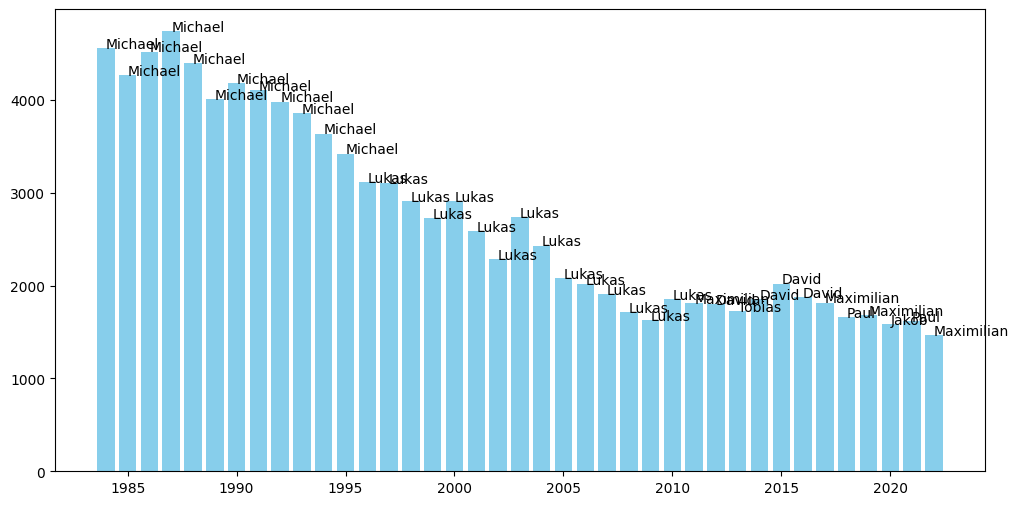

In [7]:
#most_pop_malenames during years
pop_male_names_year = pd.read_sql("""WITH RankedNames AS (SELECT vorname, jahr_id, geschlecht_bin, Anzahl, ROW_NUMBER() OVER (PARTITION BY jahr_id ORDER BY Anzahl DESC) as name_rank FROM names_per_year WHERE geschlecht_bin = '1') SELECT vorname, jahr_id, Anzahl FROM RankedNames WHERE name_rank = 1;""", conn)
print(pop_male_names_year.head(34))
plt.figure(figsize=(12, 6))
plt.bar(pop_male_names_year['jahr_id'], pop_male_names_year['Anzahl'], color='skyblue')

plt.xticks(rotation=90)
for index, row in pop_male_names_year.iterrows():
    plt.text(row['jahr_id'], row['Anzahl'], row['vorname'], )
plt.show()

/var/folders/8b/lrhnn7nd3gv8q1l94jz0p1h00000gn/T/ipykernel_23750/1704300549.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pop_fem_names = pd.read_sql("""WITH RankedNames AS (SELECT vorname, jahr_id, geschlecht_bin, Anzahl, ROW_NUMBER() OVER (PARTITION BY jahr_id ORDER BY Anzahl DESC) as name_rank FROM names_per_year WHERE geschlecht_bin = '2') SELECT vorname, jahr_id, Anzahl FROM RankedNames WHERE name_rank = 1;""", conn)


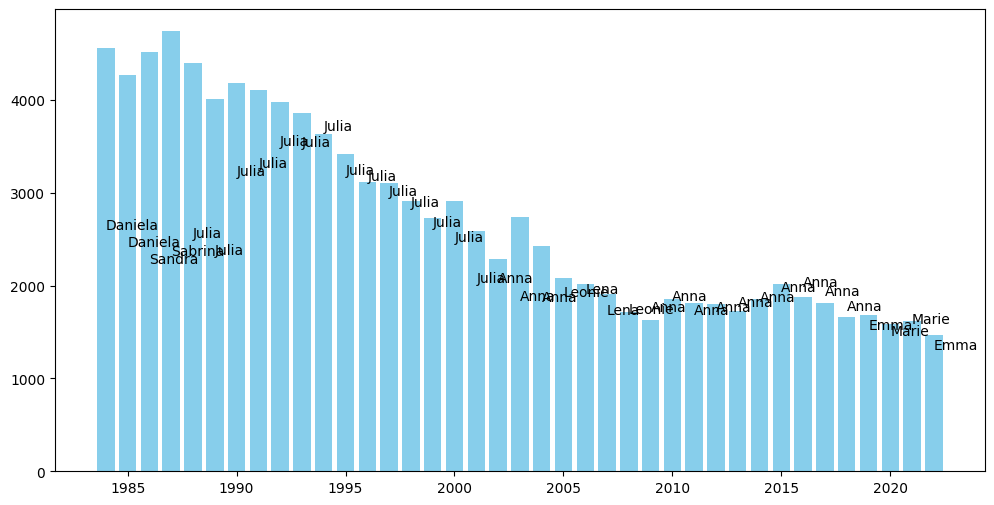

In [ ]:
#most_pop_malenames during years
pop_fem_names_year = pd.read_sql("""WITH RankedNames AS (SELECT vorname, jahr_id, geschlecht_bin, Anzahl, ROW_NUMBER() OVER (PARTITION BY jahr_id ORDER BY Anzahl DESC) as name_rank FROM names_per_year WHERE geschlecht_bin = '2') SELECT vorname, jahr_id, Anzahl FROM RankedNames WHERE name_rank = 1;""", conn)
print(pop_fem_names_year.head(34))
plt.figure(figsize=(12, 6))
plt.bar(pop_fem_names_year['jahr_id'], pop_fem_names_year['Anzahl'], color='skyblue')

plt.xticks(rotation=90)
for index, row in pop_fem_names_year.iterrows():
    plt.text(row['jahr_id'], row['Anzahl'], row['vorname'], )
plt.show()

In [ ]:
#the most popular male name
most_pop_male_names = pd.read_sql("""SELECT * FROM vornamen_counts ORDER BY Anzahl desc; """, conn)
print(most_pop_male_names.head(1))
#the most popular female name
most_pop_fem_names = pd.read_sql("""SELECT Vorname, SUM(Anzahl) AS Total FROM vornamen WHERE geschlecht_bin = 2 GROUP BY 
Vorname ORDER BY Total DESC LIMIT 1;""", conn)
print(most_pop_fem_names.head(2))


/var/folders/8b/lrhnn7nd3gv8q1l94jz0p1h00000gn/T/ipykernel_23750/1056209369.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  most_pop_male_names = pd.read_sql("""SELECT * FROM vornamen_counts ORDER BY Anzahl desc; """, conn)
/var/folders/8b/lrhnn7nd3gv8q1l94jz0p1h00000gn/T/ipykernel_23750/1056209369.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  most_pop_fem_names = pd.read_sql("""SELECT


   id  Vorname  Anzahl
0  23  Michael   82474
  Vorname    Total
0   Julia  73028.0


/var/folders/8b/lrhnn7nd3gv8q1l94jz0p1h00000gn/T/ipykernel_23750/241451410.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  most_pop_unisex_names = pd.read_sql("""SELECT


<BarContainer object of 10 artists>

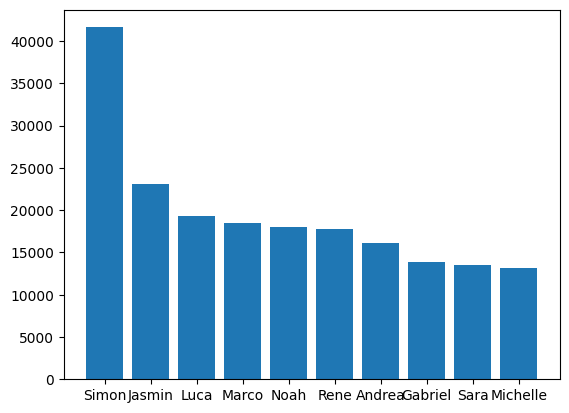

In [ ]:
most_pop_unisex_names = pd.read_sql("""SELECT 
    v.Vorname, 
    SUM(v.Anzahl) as Total
FROM 
    vornamen v
WHERE 
    v.Vorname IN (SELECT Vorname FROM vornamen WHERE geschlecht_bin = 1)
    AND v.Vorname IN (SELECT Vorname FROM vornamen WHERE geschlecht_bin = 2)
GROUP BY 
    v.Vorname
ORDER BY 
    Total DESC
LIMIT 10;""", conn)
plt.bar(most_pop_unisex_names['Vorname'], most_pop_unisex_names['Total'])

In [ ]:
gender_name_count = pd.read_sql("""SELECT COUNT(DISTINCT vorname) FROM vornamen GROUP BY geschlecht_bin;""", conn)
print(gender_name_count)

/var/folders/8b/lrhnn7nd3gv8q1l94jz0p1h00000gn/T/ipykernel_23750/1088886347.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  gender_name_count = pd.read_sql("""SELECT COUNT(DISTINCT vorname) FROM vornamen GROUP BY geschlecht_bin;""", conn)


   COUNT(DISTINCT vorname)
0                    10725
1                    11718


In [8]:
bezirke_most_pop_names = pd.read_sql("""WITH RankedNames AS (
    SELECT 
        b.bundesland,
        v.geschlecht_bin,
        v.vorname,
        SUM(v.anzahl) AS Total,
        RANK() OVER (PARTITION BY b.bundesland, v.geschlecht_bin ORDER BY SUM(v.anzahl) DESC) as name_rank
    FROM 
        vornamen v
    INNER JOIN 
        bezirke b ON v.bezirk_id = b.bezirk_id
    WHERE 
        v.jahr_id <= 2010
    GROUP BY 
        b.bundesland, v.geschlecht_bin, v.vorname
)
SELECT 
    bundesland, 
    geschlecht_bin, 
    vorname, 
    Total
FROM 
    RankedNames
WHERE 
    name_rank = 1;
""" ,conn)
bezirke_most_pop_names.head(10)

/var/folders/8b/lrhnn7nd3gv8q1l94jz0p1h00000gn/T/ipykernel_30738/1500609121.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bezirke_most_pop_names = pd.read_sql("""WITH RankedNames AS (


,bundesland,geschlecht_bin,vorname,Total
0,Burgenland,1,Michael,4272.0
1,Burgenland,2,Julia,3306.0
2,Kärnten,1,Michael,7767.0
3,Kärnten,2,Julia,6195.0
4,Niederösterreich,1,Michael,22818.0
5,Niederösterreich,2,Julia,18306.0
6,Oberösterreich,1,Michael,24582.0
7,Oberösterreich,2,Julia,19767.0
8,Salzburg,1,Michael,7902.0
9,Salzburg,2,Julia,6894.0
